In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('db.csv', on_bad_lines='skip', sep='\t')

In [3]:
df

,from_id,message,date
0,channel1101170442,Приветствуем всех в нашем Telegram-канале! ✌️️...,2017-02-28 19:55:32
1,channel1101170442,👑 Награждение победительницы конкурса красоты ...,2017-03-03 18:33:24
2,channel1101170442,🐍 Американский селекционер Джастин Кобылка пот...,2017-03-09 17:11:06
3,channel1101170442,"А вы за участие России в конкурсе \""Евровидени...",2017-03-14 11:13:27
4,channel1101170442,"Не болейте, друзья!",2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,Брифинг Минобороны России,2022-11-17 15:54:29
118279,channel1101170442,Украинских экспертов допустили на место падени...,2022-11-17 15:57:53
118280,channel1101170442,"Порошенко заявил российским пранкерам, предста...",2022-11-17 16:06:13
118281,channel1101170442,"Израиль сообщил, что завершил испытания морско...",2022-11-17 16:06:57


# Removing stopwords

In [4]:
#pip install nltk

In [5]:
import nltk

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [7]:
stopsRUS = stopwords.words('russian')
stopsENG = stopwords.words('english')

stopsRUS.remove('не')
stopsENG.remove('not')

In [8]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewshatalov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
print(stopsRUS)
print(stopsENG)

['и', 'в', 'во', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем',

# removing emojies


In [10]:
import re
df_without_emoji = df

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df_without_emoji['message'] = df_without_emoji['message'].apply(deEmojify)

In [11]:
df_without_emoji

,from_id,message,date
0,channel1101170442,Приветствуем всех в нашем Telegram-канале! Вс...,2017-02-28 19:55:32
1,channel1101170442,Награждение победительницы конкурса красоты с...,2017-03-03 18:33:24
2,channel1101170442,Американский селекционер Джастин Кобылка потр...,2017-03-09 17:11:06
3,channel1101170442,"А вы за участие России в конкурсе \""Евровидени...",2017-03-14 11:13:27
4,channel1101170442,"Не болейте, друзья!",2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,Брифинг Минобороны России,2022-11-17 15:54:29
118279,channel1101170442,Украинских экспертов допустили на место падени...,2022-11-17 15:57:53
118280,channel1101170442,"Порошенко заявил российским пранкерам, предста...",2022-11-17 16:06:13
118281,channel1101170442,"Израиль сообщил, что завершил испытания морско...",2022-11-17 16:06:57


# Removing signs

In [12]:
#nltk.download('punkt')

In [13]:
df_without_signs = df_without_emoji

def deSigns(text):
    regrex_pattern = re.compile(pattern = '[!@"“’«»#\\\\$%&\'()*+,—/:;<=>?^_`{|}~\[\]]', flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
#def deSignsBackSlash(text):
#    regrex_pattern = re.compile(pattern = '\\\\', flags = re.UNICODE)
#    return regrex_pattern.sub(r'',text)

df_without_signs['message'] = df_without_signs['message'].apply(deSigns)
#df_without_signs['message'] = df_without_signs['message'].apply(deSignsBackSlash

In [14]:
df_without_signs

,from_id,message,date
0,channel1101170442,Приветствуем всех в нашем Telegram-канале Все...,2017-02-28 19:55:32
1,channel1101170442,Награждение победительницы конкурса красоты с...,2017-03-03 18:33:24
2,channel1101170442,Американский селекционер Джастин Кобылка потр...,2017-03-09 17:11:06
3,channel1101170442,А вы за участие России в конкурсе Евровидение,2017-03-14 11:13:27
4,channel1101170442,Не болейте друзья,2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,Брифинг Минобороны России,2022-11-17 15:54:29
118279,channel1101170442,Украинских экспертов допустили на место падени...,2022-11-17 15:57:53
118280,channel1101170442,Порошенко заявил российским пранкерам представ...,2022-11-17 16:06:13
118281,channel1101170442,Израиль сообщил что завершил испытания морской...,2022-11-17 16:06:57


# Lemmatization

In [15]:
#pip install pymorphy2

In [16]:
import pymorphy2

In [17]:
%%time
df_normal = df_without_signs

morph = pymorphy2.MorphAnalyzer()

def converter (sentence):
    list = []
    words = sentence.split()
    for item in words:
        list.append(morph.parse(item)[0].normal_form)
    return ' '.join(list) 

df_normal['message'] = df_normal['message'].apply(converter)

CPU times: user 7min 10s, sys: 1.67 s, total: 7min 12s
Wall time: 7min 12s


In [18]:
df_normal

,from_id,message,date
0,channel1101170442,приветствовать весь в наш telegram-канал всегд...,2017-02-28 19:55:32
1,channel1101170442,награждение победительница конкурс красота сре...,2017-03-03 18:33:24
2,channel1101170442,американский селекционер джастин кобылка потра...,2017-03-09 17:11:06
3,channel1101170442,а вы за участие россия в конкурс евровидение,2017-03-14 11:13:27
4,channel1101170442,не болеть друг,2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,брифинг минобороны россия,2022-11-17 15:54:29
118279,channel1101170442,украинский эксперт допустить на место падение ...,2022-11-17 15:57:53
118280,channel1101170442,порошенко заявить российский пранкер представи...,2022-11-17 16:06:13
118281,channel1101170442,израиль сообщить что завершить испытание морск...,2022-11-17 16:06:57


# Tokenizing

In [19]:
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopsRUS)]))

In [20]:
df_tokenized = df_without_emoji
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

df_tokenized['tokenized'] = df_tokenized.apply(lambda x: tokenize(x['message']), axis=1)

In [21]:
df_tokenized

,from_id,message,date,tokenized
0,channel1101170442,приветствовать весь наш telegram-канал курс кл...,2017-02-28 19:55:32,"[приветствовать, весь, наш, курс, ключевой, со..."
1,channel1101170442,награждение победительница конкурс красота сре...,2017-03-03 18:33:24,"[награждение, победительница, конкурс, красота..."
2,channel1101170442,американский селекционер джастин кобылка потра...,2017-03-09 17:11:06,"[американский, селекционер, джастин, кобылка, ..."
3,channel1101170442,участие россия конкурс евровидение,2017-03-14 11:13:27,"[участие, россия, конкурс, евровидение]"
4,channel1101170442,не болеть друг,2017-03-14 19:49:56,"[не, болеть, друг]"
...,...,...,...,...
118278,channel1101170442,брифинг минобороны россия,2022-11-17 15:54:29,"[брифинг, минобороны, россия]"
118279,channel1101170442,украинский эксперт допустить место падение рак...,2022-11-17 15:57:53,"[украинский, эксперт, допустить, место, падени..."
118280,channel1101170442,порошенко заявить российский пранкер представи...,2022-11-17 16:06:13,"[порошенко, заявить, российский, пранкер, пред..."
118281,channel1101170442,израиль сообщить завершить испытание морской с...,2022-11-17 16:06:57,"[израиль, сообщить, завершить, испытание, морс..."


# spaCY

In [22]:
#pip install spacy

In [23]:
#pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz

In [24]:
import spacy

In [25]:
start_clustering = 100
end_clustering = 150

In [26]:
nlp = spacy.load("ru_core_news_sm")
df_tokenized_2 = df_tokenized['message'][start_clustering:end_clustering + 1].apply(nlp)

In [27]:
df_tokenized_2

100    (вид, получить, название, марианский, морской,...
101    (запуск, falcon, heavy, состояться, следующий,...
102    (момоа, пояснить, наткнуться, спойлер, время, ...
103    (инженер, тольяттинский, компания, yagalet, за...
104    (смочь, решить, вопрос, украина, именно, прийт...
105    (торжественный, зажжение, высокий, мир, живой,...
106    (военный, изъять, несколько, тысяча, единица, ...
107    (ракета, -, носитель, среднее, класс, союз-2.1...
108    (бетти, миллер, подмешивать, яд, пища, напиток...
109    (полицейский, мартин, уиллис, около, 15, минут...
110    (добавить, всё, свой, ошибка, президент, украи...
111    (группа, получить, известность, благодаря, пес...
112    (новосибирский, область, пятеро, ребёнок, поги...
113    (мария, шарапов, серить, уильямс, принять, уча...
114    (идти, выборы, уникальный, программа, право, с...
115    (05.12.2017, соответствие, закон, российский, ...
116    (знаменитый, французский, певец, композитор, с...
117    (захаров, заявить, попыт

In [28]:
vectors_list = [doc.vector for doc in df_tokenized_2]

In [29]:
len(vectors_list)

51

In [30]:
from scipy.spatial.distance import cdist
cosine_distance_matrix = cdist(vectors_list, vectors_list, metric='cosine')

In [31]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

In [32]:
print(cosine_distance_matrix)

[[1.11022302e-16 1.92136769e-01 2.14116145e-01 ... 2.91192125e-01
  2.32283138e-01 3.42079957e-01]
 [1.92136769e-01 1.11022302e-16 3.28949479e-01 ... 4.35270241e-01
  2.33384019e-01 4.55906675e-01]
 [2.14116145e-01 3.28949479e-01 1.11022302e-16 ... 1.66100097e-01
  2.10677514e-01 3.97492179e-01]
 ...
 [2.91192125e-01 4.35270241e-01 1.66100097e-01 ... 1.11022302e-16
  2.94745764e-01 4.37366390e-01]
 [2.32283138e-01 2.33384019e-01 2.10677514e-01 ... 2.94745764e-01
  0.00000000e+00 4.38503036e-01]
 [3.42079957e-01 4.55906675e-01 3.97492179e-01 ... 4.37366390e-01
  4.38503036e-01 2.22044605e-16]]


In [33]:
len(cosine_distance_matrix)

51

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [85.0, 85.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [97.5, 97.5, 142.5, 142.5],
  [53.75, 53.75, 120.0, 120.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [86.875, 86.875, 172.5, 172.5],
  [35.0, 35.0, 129.6875, 129.6875],
  [12.5, 12.5, 82.34375, 82.34375],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [262.5, 262.5, 290.0, 290.0],
  [240.0, 240.0, 276.25, 276.25],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [258.125, 258.125, 312.5, 312.5],
  [220.0, 220.0, 285.3125, 285.3125],
  [200.0, 200.0, 252.65625, 252.6562

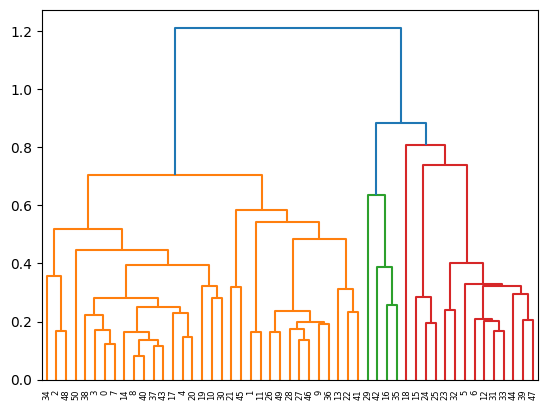

In [34]:
from scipy.spatial.distance import cdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
condensed_distance_matrix = squareform(cosine_distance_matrix, checks=False)

# Perform hierarchical clustering
linkage_matrix = linkage(condensed_distance_matrix, method='ward')

# Plot dendrogram
dendrogram(linkage_matrix)

In [35]:
condensed_distance_matrix

array([0.19213677, 0.21411614, 0.15804324, ..., 0.29474576, 0.43736639,
       0.43850304])

In [36]:
from scipy.cluster.hierarchy import fcluster

# Assign each message to a cluster
max_distance = 0.5  # You may need to adjust this value based on the dendrogram
clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')

# Create a dictionary that maps cluster numbers to message indices
cluster_dict = {}
for i in range(len(clusters)):
    if clusters[i] not in cluster_dict:
        cluster_dict[clusters[i]] = [i]
    else:
        cluster_dict[clusters[i]].append(i)

n_clusters = len(cluster_dict)
for i in range(1, n_clusters + 1):
    cluster_messages = [df_tokenized.iloc[j + start_clustering]['message'] for j in cluster_dict[i]]
    print(f"Cluster {i}: {cluster_messages}")


Cluster 1: ['момоа пояснить наткнуться спойлер время посещение съёмочный площадки. рассказать являться больший фанат сериал вовсе не хотеть ранний время знать всё закончится. nя воскликнуть черта не хотеть знать это вспоминать актёр.', 'всё-таки известный событие вторник не пройти мимо меня. вчера сесть голос сегодня подняться температура марш 10.12 обещать снова строй рядом заявить саакашвили.', 'это песков написать прочитать вопрос дать спасибо']
Cluster 2: ['вид получить название марианский морской слизень mariana snailfish обитать глубина 81 километра. это исследователь отмечать теория максимально возможный глубина пригодный существование рыба составлять 82 километра.', 'инженер тольяттинский компания yagalet задумать создать автомобиль который ездить летать. режим полёт машина смочь приподняться небольшой высота помощь воздушный подушки.', 'смочь решить вопрос украина именно прийти договорённость который устроить оба сторона получить позитивный результат. это потребовать серьёзный

# Func for clustering

In [37]:
cluster_dict_prev = cluster_dict

In [38]:
import math
import random

In [39]:
def add_points(start_clustering, end_clustering, cluster_dict):
    #take part of prev clusters
    half_cluster_dict = {}
    for key, value in cluster_dict.items():
        half_len = math.ceil(len(value)/2)
        half_cluster_dict[key] = random.sample(value, half_len)
    #this if we want to compare half_clusters
    ###global cluster_dict_prev 
    ###cluster_dict_prev = half_cluster_dict
    #add points from prev clustering to list prev_points
    prev_points = []
    for points in half_cluster_dict.values():
        prev_points.extend(points)
    
    #make actual indexes
    prev_points = list(map(lambda x: x + start_clustering, prev_points))
    
    #print(prev_points)
    
    #add new points to prev_points
    for i in range(start_clustering, end_clustering+1):
        prev_points.append(i)
        
    #print(prev_points)
    
    #creade a new object
    df_tokenized_for_new_clustring = df_tokenized.loc[prev_points, 'message'].apply(nlp)
    
    vectors_list = [doc.vector for doc in df_tokenized_for_new_clustring]
    
    #create matrix of distances
    cosine_distance_matrix = cdist(vectors_list, vectors_list, metric='cosine')
    condensed_distance_matrix = squareform(cosine_distance_matrix, checks=False)

    # Perform hierarchical clustering
    linkage_matrix = linkage(condensed_distance_matrix, method='ward')

    # Plot dendrogram
    dendrogram(linkage_matrix)
    
    # Assign each message to a cluster
    max_distance = 0.5  # You may need to adjust this value based on the dendrogram
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')

    # Create a dictionary that maps cluster numbers to message indices
    cluster_dict = {}
    for i in range(len(clusters)):
        if clusters[i] not in cluster_dict:
            cluster_dict[clusters[i]] = [i]
        else:
            cluster_dict[clusters[i]].append(i)

    n_clusters = len(cluster_dict)
    return cluster_dict

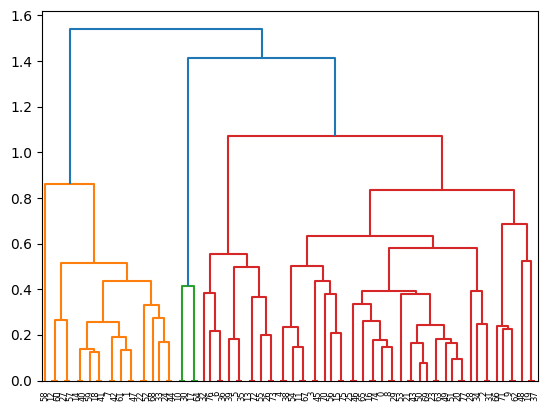

In [40]:
cluster_dict = add_points(151, 200, cluster_dict)

In [41]:
cluster_dict

{9: [0, 8, 16, 20, 21, 23, 25, 29, 43, 46, 49, 50, 51, 53, 63, 65, 69, 74, 77],
 2: [1, 7, 14, 18, 22, 24, 33, 40, 41, 42, 44, 47, 52, 59, 61, 68],
 10: [2, 28, 31, 34],
 8: [3, 15, 45, 56, 70, 75],
 7: [4, 11, 38, 54, 67],
 6: [5, 13, 26, 35, 39, 55, 72, 73],
 5: [6, 32, 36, 76],
 11: [9, 62, 66, 71],
 4: [10, 17, 30, 64],
 1: [12, 27, 57, 60],
 12: [19, 37],
 13: [48],
 3: [58]}

In [42]:
def find_base_clusters_old_version(cluster_dict_prev, cluster_dict):
    base_clusters = {}

    for new_cluster_id, new_cluster in cluster_dict.items():
        max_intersection = []
        base_cluster_id = None

        for old_cluster_id, old_cluster in cluster_dict_prev.items():
            intersection = list(set(old_cluster) & set(new_cluster))
            if len(intersection) > len(max_intersection):
                max_intersection = intersection
                base_cluster_id = old_cluster_id

        if base_cluster_id is not None:
            base_clusters[base_cluster_id] = new_cluster_id

    return list(base_clusters.items())

In [43]:
def find_base_clusters_with_intersaction(cluster_dict_prev, cluster_dict):
    base_clusters = []

    for new_cluster_id, new_cluster in cluster_dict.items():
        max_intersection = []
        base_cluster_id = None

        for old_cluster_id, old_cluster in cluster_dict_prev.items():
            intersection = list(set(old_cluster) & set(new_cluster))
            if len(intersection) > len(max_intersection):
                max_intersection = intersection
                base_cluster_id = old_cluster_id

        if base_cluster_id is not None and max_intersection:
            missing_points = list(set(cluster_dict_prev[base_cluster_id]) - set(max_intersection))
            base_clusters.append((base_cluster_id, new_cluster_id, max_intersection, missing_points))

    return base_clusters

In [44]:
def find_base_clusters(cluster_dict_prev, cluster_dict):
    base_clusters = []
    for new_cluster_id, new_cluster in cluster_dict.items():
        max_intersection = []
        base_cluster_id = None
        for old_cluster_id, old_cluster in cluster_dict_prev.items():
            intersection = list(set(old_cluster) & set(new_cluster))
            if len(intersection) > len(max_intersection):
                max_intersection = intersection
                base_cluster_id = old_cluster_id
        if base_cluster_id is not None and max_intersection:
            base_clusters.append((base_cluster_id, new_cluster_id, max_intersection))
    return base_clusters


def remove_outdated_clusters(cluster_dict, base_clusters, cluster_counters, threshold, added_points):
    updated_cluster_counters = {key: 0 for key in cluster_dict.keys()}
    for base_cluster, new_cluster, common_elements in base_clusters:
        # Если базовый кластер и новый кластер имеют одинаковое содержание, значит, новые точки не были добавлены
        if set(cluster_dict[new_cluster]) == set(cluster_dict_prev[base_cluster]):
            increment = 1 - 1/added_points
            updated_cluster_counters[new_cluster] = cluster_counters.get(base_cluster, 0) + increment
        else:
            # Если были добавлены новые точки, обнуляем счетчик
            updated_cluster_counters[new_cluster] = 0
            
    # Удалить устаревшие кластеры
    for cluster_id in list(cluster_dict.keys()):
        if updated_cluster_counters.get(cluster_id, 0) > threshold:
            del cluster_dict[cluster_id]
    return cluster_dict, updated_cluster_counters

In [45]:
def initialize_cluster_counters(cluster_dict):
    cluster_counters = {cluster_id: 1 for cluster_id in cluster_dict}
    return cluster_counters


In [46]:
cluster_counters = initialize_cluster_counters(cluster_dict_prev)

In [47]:
base_clusters = find_base_clusters(cluster_dict_prev, cluster_dict)
base_clusters

[(2, 9, [0, 8, 43, 50, 20]),
 (2, 2, [40, 14, 7]),
 (1, 10, [2, 34]),
 (2, 8, [3]),
 (2, 7, [4, 38]),
 (9, 6, [5, 39]),
 (9, 5, [32, 6]),
 (5, 11, [9]),
 (2, 4, [17, 10, 30]),
 (9, 1, [12]),
 (2, 12, [19, 37]),
 (1, 13, [48])]

In [48]:
cluster_dict, cluster_counters = remove_outdated_clusters(cluster_dict, base_clusters, 
                                                          cluster_counters, threshold=1, added_points=50)

In [49]:
cluster_dict

{9: [0, 8, 16, 20, 21, 23, 25, 29, 43, 46, 49, 50, 51, 53, 63, 65, 69, 74, 77],
 2: [1, 7, 14, 18, 22, 24, 33, 40, 41, 42, 44, 47, 52, 59, 61, 68],
 10: [2, 28, 31, 34],
 8: [3, 15, 45, 56, 70, 75],
 7: [4, 11, 38, 54, 67],
 6: [5, 13, 26, 35, 39, 55, 72, 73],
 5: [6, 32, 36, 76],
 11: [9, 62, 66, 71],
 4: [10, 17, 30, 64],
 1: [12, 27, 57, 60],
 12: [19, 37],
 13: [48],
 3: [58]}

In [50]:
cluster_dict_prev = cluster_dict

In [51]:
cluster_dict_prev

{9: [0, 8, 16, 20, 21, 23, 25, 29, 43, 46, 49, 50, 51, 53, 63, 65, 69, 74, 77],
 2: [1, 7, 14, 18, 22, 24, 33, 40, 41, 42, 44, 47, 52, 59, 61, 68],
 10: [2, 28, 31, 34],
 8: [3, 15, 45, 56, 70, 75],
 7: [4, 11, 38, 54, 67],
 6: [5, 13, 26, 35, 39, 55, 72, 73],
 5: [6, 32, 36, 76],
 11: [9, 62, 66, 71],
 4: [10, 17, 30, 64],
 1: [12, 27, 57, 60],
 12: [19, 37],
 13: [48],
 3: [58]}

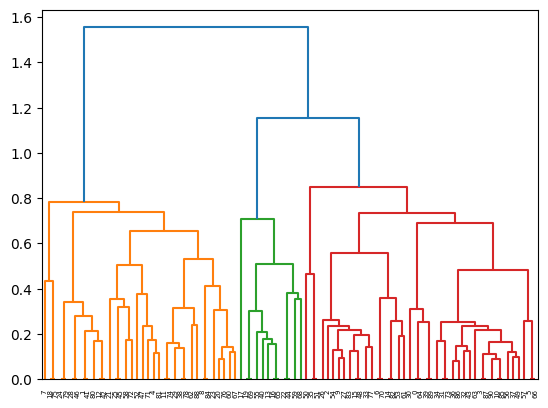

In [52]:
cluster_dict = add_points(201, 250, cluster_dict)

In [53]:
cluster_dict

{13: [0, 30, 39, 64, 89],
 2: [1, 12, 24, 28, 41, 42, 46, 79, 80],
 11: [2, 9, 15, 26, 27, 33, 48, 54, 77, 83],
 14: [3,
  5,
  10,
  31,
  32,
  34,
  36,
  37,
  43,
  49,
  56,
  57,
  63,
  66,
  73,
  85,
  86,
  87,
  90],
 4: [4, 47, 52, 71, 81],
 12: [6, 14, 53, 61, 70, 82],
 1: [7, 18, 75],
 6: [8, 20, 23, 60, 67, 76, 84],
 5: [11, 29, 38, 62, 74, 78, 88],
 7: [13, 16, 19, 40, 55, 65, 69],
 9: [17],
 3: [21, 25, 45, 58, 72],
 8: [22, 44, 59, 68],
 10: [35, 50, 51]}

In [54]:
cluster_dict_prev

{9: [0, 8, 16, 20, 21, 23, 25, 29, 43, 46, 49, 50, 51, 53, 63, 65, 69, 74, 77],
 2: [1, 7, 14, 18, 22, 24, 33, 40, 41, 42, 44, 47, 52, 59, 61, 68],
 10: [2, 28, 31, 34],
 8: [3, 15, 45, 56, 70, 75],
 7: [4, 11, 38, 54, 67],
 6: [5, 13, 26, 35, 39, 55, 72, 73],
 5: [6, 32, 36, 76],
 11: [9, 62, 66, 71],
 4: [10, 17, 30, 64],
 1: [12, 27, 57, 60],
 12: [19, 37],
 13: [48],
 3: [58]}